## FITS files
Astronomical images are usually stored in FITS files. Before, we looked at FITS tables, which are a different variant. Here we'll look at FITS images. Opening up the FITS file and understanding the data inside can be a bit of a dark art, as different sofware leave differnet keywords in headers. There is a large amount of online documentation  [here](http://docs.astropy.org/en/stable/io/fits/index.html?highlight=FITS) to check out.

Inside the `Plotting` folder you can find 'NGC_1316_I_20cm_fev1989_i.fits' which is a FITS image file. I found this FITS file by searching on the NASA/IPAC Extragalactic Database (NED - see [here](http://ned.ipac.caltech.edu/ui/?q=imageservice&objname=fornax%20A)). The image came from this research [here](http://adsabs.harvard.edu/cgi-bin/bib_query?1989ApJ...346L..17F). First off, we open the file, `print` out some information about the file, and grab some data.

In [ ]:
##We use the fits class inside astropy
from astropy.io import fits

with fits.open('NGC_1316_I_20cm_fev1989_i.fits') as hdus:
    ##We use the open method in fits to read in data from
    ##the fits file
    print(hdus.info())
    print ("nothing")
    print(hdus)
    print("nothing")

    ##Because you can have more than one hdu, hdus is actually a list
    ##To acces the first (and only) hdu, use hdus[0]
    hdu1 = hdus[0]
    print(hdu1)
    print("nothing")

    ##The data inside hdu1 is an attribute called data
    data = hdu1.data
    print(data)

Filename: NGC_1316_I_20cm_fev1989_i.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     124   (512, 512, 1, 1)   int16 (rescales to float32)   
None
nothing
nothing
nothing
[[[[3.2037497e-07 3.2037497e-07 3.2037497e-07 ... 3.2037497e-07
    3.2037497e-07 3.2037497e-07]
   [3.2037497e-07 3.2037497e-07 3.2037497e-07 ... 3.2037497e-07
    3.2037497e-07 3.2037497e-07]
   [3.2037497e-07 3.2037497e-07 3.2037497e-07 ... 3.2037497e-07
    3.2037497e-07 3.2037497e-07]
   ...
   [3.2037497e-07 3.2037497e-07 3.2037497e-07 ... 3.2037497e-07
    3.2037497e-07 3.2037497e-07]
   [3.2037497e-07 3.2037497e-07 3.2037497e-07 ... 3.2037497e-07
    3.2037497e-07 3.2037497e-07]
   [3.2037497e-07 3.2037497e-07 3.2037497e-07 ... 3.2037497e-07
    3.2037497e-07 3.2037497e-07]]]]


> Wait, what's up with `with`? In many other computer languages, memory is handled explicitly as part of the syntax. This is one of the notoiously difficult things in a lanugauge like `C` to get correct. `python` is lovely because is essentially does it all for you, talking to the computer automagically saying things like _"this is a float, and it lives here, it needs this much memory"_ etc. Unfortunately, this also means you never really know what it's doing half the time. So when opening something potentially large or complicated like a FITS file, using the `with` command here says _"OK `python`, do your magic and open up this FITS file, and assign some parts of it to an array called `data`. Once we pop out of the indented whitespace below `with`, however, clean up after yourself, closing the `hdus` object and freeing all the memory associated with that."_ This is a nice, clean way of ensuring you don't have things hanging around in buffer that you don't need.

OK, so there's a large of information. HDU means Header Data Unit, which is the highest level component of the FITS file structure. You can have multiple HDUs in a single FITS file - in this example we only have one. Most important here is the 'Dimensions' Column, which shows `(512, 512, 1, 1)`. This means we have data of that shape, so a 4-dimensional data set. Often FITS files come with multiple frequency slices, so even though we are going to plot a 2D image, there a 4 Dimensions to the data. So what shape is our data?

In [ ]:
print(data.shape)

(1, 1, 512, 512)


Note that the dimensions of the data are reported by `astropy` in the opposite order to that in the FITS file. This is annoying but unavoidable. We can use the data `array` to do any kind of science we want with this galaxy - find the maximum brightness, the rms across the galaxy, all kinds of stuff. For now we're just going to plot it.  Now, finally, we'll pull out the relevant data and plot it with `imshow`.

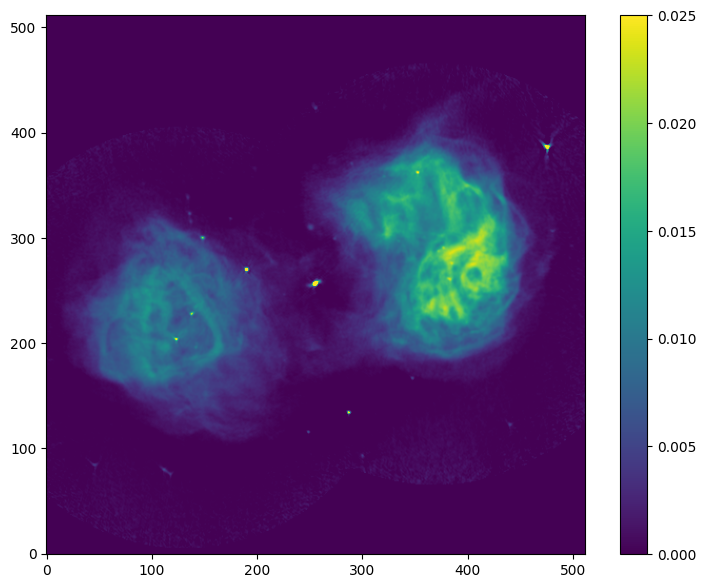

In [ ]:
##OK, we want to plot a 2D array, so we slice data
##to make it 2D
slice_data = data[0,0,:,:]

##Now we plot and succeed
import matplotlib.pyplot as plt

##This creates a matplotlib figure object
##We will create our plot within this
##The figsize let's you control how large
##the figure is, in order (x,y)
fig = plt.figure(figsize=(9,7))


##This add an axis object - we add it to the figure
##You can control how many subplots to add with
##the numbers - here we want the first axis of a
##one by one grid - so we just pass three 1s.
ax = fig.add_subplot(111)


##The imshow method plots things in 2D
##We use the imshow method to return image
##We can use image to plot a colorbar
##vmin and vmax set the lower and upper
##bounds of the colour scale
##we add origin='lower' because numpy arrays have a zero
##top left - FITS files have 0 bottom left, so we need
##to flip the image
image = ax.imshow(slice_data,vmin=0,vmax=0.025,origin='lower')

##the last three commands can just be acheived
##by the following command:

##image = plt.imshow(slice_data,vmin=0,vmax=0.025,origin='lower')

##From personal experience however, I find you can get
##finer control over the final plot by explicitly
##created the figure and axes, especially if you are plotting
##multiple axes on the same figure. Feel free to plot
##whichever way you want. Live your best life

##This adds a colorbar - the colorbar
##explains the relationship between the
##colour scale and the values it represents
##Getting in the habit of specifing which ax
##to plot the colour
fig.colorbar(image, ax=ax)

plt.show()

Oooooo lovely radio galaxy. Say you want to compare two images side by side, with similar plotting techniques. What's an efficient way of doing that? Define a function! Here we'll plot two simulations I ran in this work: [Shapelets paper](https://ui.adsabs.harvard.edu/abs/2020PASA...37...27L/abstract). Let's have look:

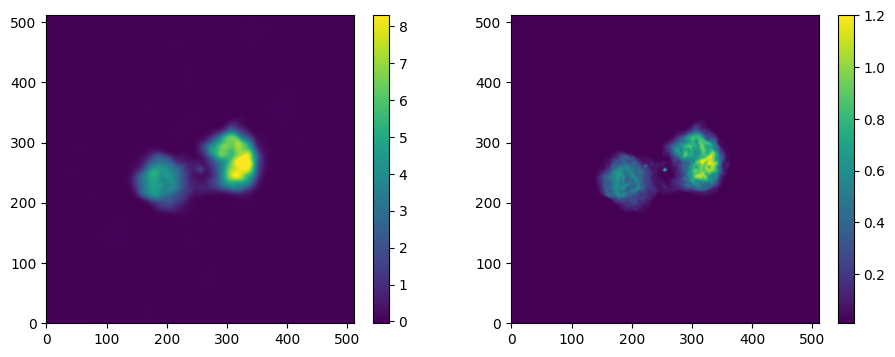

In [ ]:
def do_a_plot(filename, fig, ax, vmin, vmax):
    '''
    Given a path to a 4D FITS file (filename)
    and a matplotlib fig and ax instance, plot
    the contents of the FITS file with the given
    vmin, vmax constraints
    '''
    with fits.open(filename) as hdu:
        ##Before we broke accessing the hdu and slicing
        ##the data into multiple lines to be clear. You
        ##can actually just do it in one line!
        slice_data = hdu[0].data[0,0,:,:]

    image = ax.imshow(slice_data,vmin=vmin,vmax=vmax,origin='lower')
    fig.colorbar(image, ax=ax)


##This is a handy shortcut command in matplotlib.
##It creates a figure instance, and a number of
##axes instaces on that figure, depending on what
##arguments you pass. Here we say "2 plots in the
##horizontal, one in the vertical". The axes are
##returned in a list, which we call axs here
fig, axs = plt.subplots(1,2,figsize=(11,4))

do_a_plot('woden_VLA-ForA-MFS-image.fits', fig, axs[0], -0.05, 8.3)
do_a_plot('woden_VLA-ForA_phase1+2-MFS-image.fits', fig, axs[1], 0.01,1.2)



These plots are a little messy still though. The pixel labels don't really tell us much, and we don't know what units the plot is in. Furthermore, there is too much blank space around the edge. By adapting the code above, using the box below, we can get rid of the x/y labels, add a label that says `Jy/beam` to the colorbar (google to find the keyword needed), and modify the slice to git rid of the space around the edges.

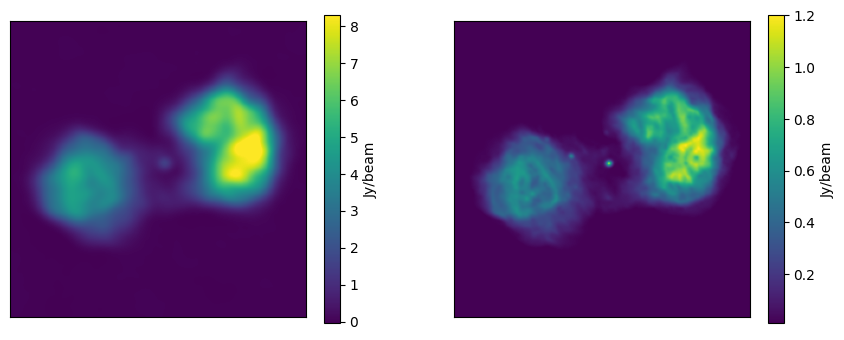

In [ ]:
def do_a_plot(filename, fig, ax, vmin, vmax):
    '''
    Given a path to a 4D FITS file (filename)
    and a matplotlib fig and ax instance, plot
    the contents of the FITS file with the given
    vmin, vmax constraints
    '''
    with fits.open(filename) as hdu:
        ##Before we broke accessing the hdu and slicing
        ##the data into multiple lines to be clear. You
        ##can actually just do it in one line!
        slice_data = hdu[0].data[0,0,125:375,125:375]


    image = ax.imshow(slice_data,vmin=vmin,vmax=vmax,origin='lower')

    ax.set_xticks([])
    ax.set_yticks([])

    fig.colorbar(image, ax=ax,label='Jy/beam')


##This is a handy shortcut command in matplotlib.
##It creates a figure instance, and a number of
##axes instaces on that figure, depending on what
##arguments you pass. Here we say "2 plots in the
##horizontal, one in the vertical". The axes are
##returned in a list, which we call axs here
fig, axs = plt.subplots(1,2,figsize=(10.5,4))


do_a_plot('woden_VLA-ForA-MFS-image.fits', fig, axs[0], -0.05, 8.3)
do_a_plot('woden_VLA-ForA_phase1+2-MFS-image.fits', fig, axs[1], 0.01,1.2)

fig.savefig('side_by_side_FornaxA.png',bbox_inches='tight')

In [ ]:
!pip install aplpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.1/978.1 kB 82.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.5/378.5 kB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 31.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 127.6 MB/s eta 0:00:00
  Created wheel for pyregion: filename=pyregion-2.2.0-cp310-cp310-linux_x86_64.whl size=364688 sha256=27187ec639d90d9662e27d57553b6fbc9667bd7e90e0be13df3fd8838e45

## `aplpy`

Right, there are a million ways to make this plot look better. One of the trickiest things to do with plotting a FITS image is to correctly labels the RA and Dec axis. There is a nice package out there already, called `aplpy`, that does many of these things neatly for you (see installation notes [here](https://aplpy.github.io/install.html). It can however be difficult to get `aplpy` to play nicely with your exact version of `numpy` and `matplotlib`, so far warning in advance. Once it works however, you can make publication-quality plots with it.

This plot is far clearer, more attractive, and includes the RA and Dec coordinate information. `aplpy` even managed to understand that this data is ooooold, so it's stored in `B1950` RA,Dec coords, rather than the more modern `J2000` standard we use today.

INFO:astropy:Setting slices=[0, 0]
Changed DATE-OBS from '07/10/86' to '1986-10-07''. [astropy.wcs.wcs]
Changed DATE-OBS from '07/10/86' to '1986-10-07''.
INFO:astropy:Auto-setting vmin to -3.009e-03
INFO:astropy:Auto-setting vmax to  2.283e-02


INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -3.009e-03 [aplpy.core]
INFO: Auto-setting vmax to  2.283e-02 [aplpy.core]


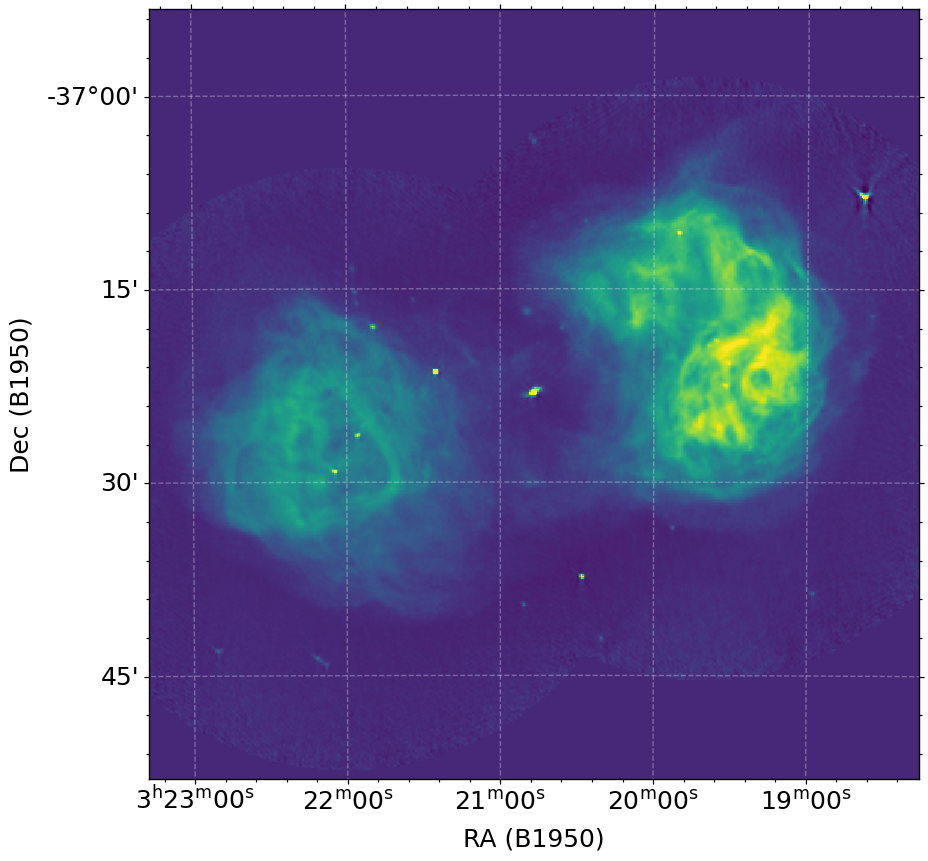

In [ ]:
import aplpy
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

##this creates an alply axis instance which I called f
f = aplpy.FITSFigure('NGC_1316_I_20cm_fev1989_i.fits',figure=fig)

##this is kind of like imshow - it add the plot, with
##a colour scheme of your choice
f.show_colorscale(cmap='viridis')

##this adds a grid to the plot which can be helpful
f.add_grid()
f.grid.set_linewidth(1.0)
f.grid.set_linestyle('dashed')
f.grid.set_alpha(0.3)
f.grid.show()

##fiddle the size and format of the labels to make
##them look nice
f.axis_labels.set_font(size=18)
f.tick_labels.set_font(size=18)
f.tick_labels.set_xformat('hh:mm:ss')
f.tick_labels.set_yformat('dd:mm')

plt.show()
fig.savefig("nice_fornaxA_plot.png",bbox_inches='tight')

In [ ]:
!pip install astropy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


INFO:astropy:Setting slices=[0, 0]


astropy version 5.2.2
numpy version 1.22.4
aplpy version 2.1.0
INFO: Setting slices=[0, 0] [aplpy.core]


INFO:astropy:Auto-setting vmin to -8.461e-01
INFO:astropy:Auto-setting vmax to  8.989e+00


INFO: Auto-setting vmin to -8.461e-01 [aplpy.core]
INFO: Auto-setting vmax to  8.989e+00 [aplpy.core]


INFO:astropy:Setting slices=[0, 0]
INFO:astropy:Auto-setting vmin to -1.010e-01
INFO:astropy:Auto-setting vmax to  1.044e+00


INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -1.010e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.044e+00 [aplpy.core]


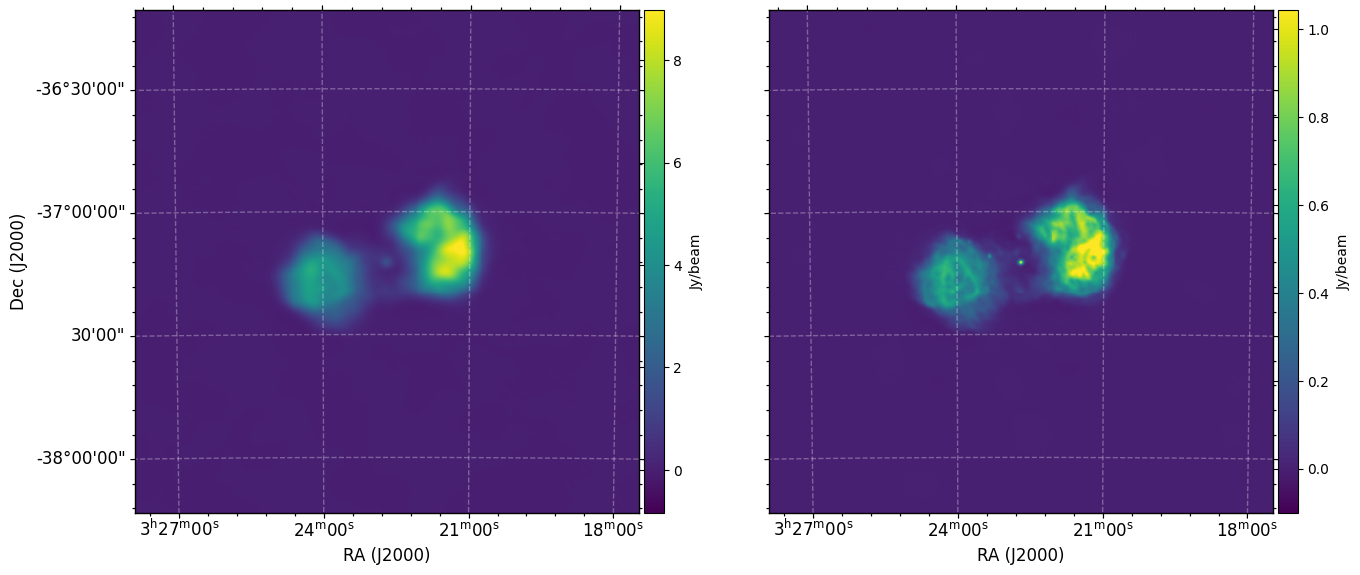

In [ ]:
import astropy
print("astropy version", astropy.__version__)
print("numpy version", np.__version__)
print("aplpy version", aplpy.__version__)

def do_an_aplpy_plot(filename, fig, subplot, vmin,vmax, hidey=False):
    '''
    Given a path to a 4D FITS file (filename)
    and a matplotlib fig and ax instance, plot
    the contents of the FITS file with the given
    vmin, vmax constraints
    '''
    ##this creates an alply axis instance which I called f
    f = aplpy.FITSFigure(filename,figure=fig, subplot=subplot, vmin=vmin,vmax=vmax,)

    ##this is kind of like imshow - it add the plot, with
    ##a colour scheme of your choice
    f.show_colorscale(cmap='viridis')

    ##This might not work on your computer - comment it out if it
    ##breaks it (see the summary lecture for a discussion on why)
    #f.recenter(50.67,-37.2,0.5)

    ##this adds a grid to the plot which can be helpful
    f.add_grid()
    f.grid.set_linewidth(1.0)
    f.grid.set_linestyle('dashed')
    f.grid.set_alpha(0.3)
    f.grid.show()

    ##fiddle the size and format of the labels to make
    ##them look nice
    f.axis_labels.set_font(size=12)
    f.tick_labels.set_font(size=12)
    f.tick_labels.set_xformat('hh:mm:ss')
    f.tick_labels.set_yformat('dd:mm:ss')

    ##Don't need the Dec label twice, as it takes up
    ##uneccessary space, so hide it on the right
    if hidey:
        f.axis_labels.hide_y()
        f.tick_labels.hide_y()

    f.add_colorbar()
    f.colorbar.show()
    f.colorbar.set_axis_label_text('Jy/beam')

##This is a handy shortcut command in matplotlib.
##It creates a figure instance, and a number of
##axes instaces on that figure, depending on what
##arguments you pass. Here we say "2 plots in the
##horizontal, one in the vertical". The axes are
##returned in a list, which we call axs here
fig = plt.figure(figsize=(15,7.5))


do_an_aplpy_plot('woden_VLA-ForA-MFS-image.fits', fig, (1,2,1), -0.05, 8.3)
do_an_aplpy_plot('woden_VLA-ForA_phase1+2-MFS-image.fits', fig, (1,2,2),0.01,12.0, hidey=True)

#fig.savefig('aplpy_side_by_side_FornaxA.png',bbox_inches='tight')
plt.show()